In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import csv


plt.style.use('bmh')
sns.set_style('whitegrid')

pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 2000)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%autosave 10

Autosaving every 10 seconds


In [2]:
house = pd.read_csv('./housing.csv')
house = house.loc[house.MSZoning  != 'C (all)']


In [3]:
#CRAZY EXPERIMENT#
houseD = pd.get_dummies(house)
houseD.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual

In [4]:
houseD['FancyHouse'] = houseD['BldgType_1Fam'] + houseD['BldgType_TwnhsE']
houseD['TallHouse'] = houseD['HouseStyle_2Story'] + houseD['HouseStyle_2.5Fin'] + houseD['HouseStyle_2.5Unf']
houseD['LessDense'] = houseD['MSZoning_RL'] + houseD['MSZoning_FV']
houseD['Top5'] = houseD['Neighborhood_NoRidge'] + houseD['Neighborhood_StoneBr'] + houseD['Neighborhood_NridgHt'] + houseD['Neighborhood_Timber'] + houseD['Neighborhood_Veenker']
#model2
houseD['exterior'] = houseD['Exterior1st_CemntBd'] + houseD['Exterior1st_VinylSd'] + houseD['Exterior1st_VinylSd'] + houseD['Exterior1st_ImStucc'] + houseD['Neighborhood_Veenker']
houseD['aircon'] = houseD['CentralAir_Y']
houseD['kitQ'] = houseD['KitchenQual_Ex']
houseD['BFT'] = houseD['BsmtFinType1_GLQ']
#Q3
houseD['ABNORMAL'] = houseD['SaleCondition_Abnorml']

houseD['age'] = 2010 - houseD['YearBuilt']

In [5]:
matrix = houseD.corr()

In [6]:
matrix.SaleCondition_Abnorml.sort_values()

SaleCondition_Normal    -0.575054
SaleType_WD             -0.135823
YearRemodAdd            -0.123496
GarageYrBlt             -0.109202
SalePrice               -0.103942
Utilities_AllPub        -0.098660
GarageCars              -0.096640
YearBuilt               -0.093521
FireplaceQu_Gd          -0.088960
GarageArea              -0.085470
GarageQual_TA           -0.085165
OverallQual             -0.082844
Foundation_PConc        -0.082780
SaleCondition_Partial   -0.081785
SaleType_New            -0.080706
GarageCond_TA           -0.080565
FullBath                -0.078868
Fireplaces              -0.078246
GarageType_Attchd       -0.077000
BsmtQual_Gd             -0.072442
ExterQual_Gd            -0.066382
Neighborhood_CollgCr    -0.063125
Neighborhood_NridgHt    -0.063057
GarageFinish_Fin        -0.060195
Electrical_SBrkr        -0.059179
exterior                -0.055864
HeatingQC_Ex            -0.055447
KitchenQual_Gd          -0.055376
Exterior2nd_VinylSd     -0.054566
MasVnrType_Sto

<h2>Conclusion</h2><br>
Negative correlation with `SaleCondition_Normal` is to be expected.
None of the other correlations seem strong enough to identify a pattern for Abnormal sale.<p>

<b>SaleType_COD</b>: Court Officer Deed/Estate<br>
<b>SaleType_Oth</b>: Other<br><br>

`SaleType_New            -0.080706
age                      0.093521`

<p>
perhaps it is something to do with inheritance/estate sales. The negative correlation with "new" and positive correlation with "age" supports this, as new houses are unlikely to be inheritance.<p>

`SalePrice               -0.103942`

Also could be a sale when someone could not afford their mortgage. Lower sale price potentially supports these theories.
<p>


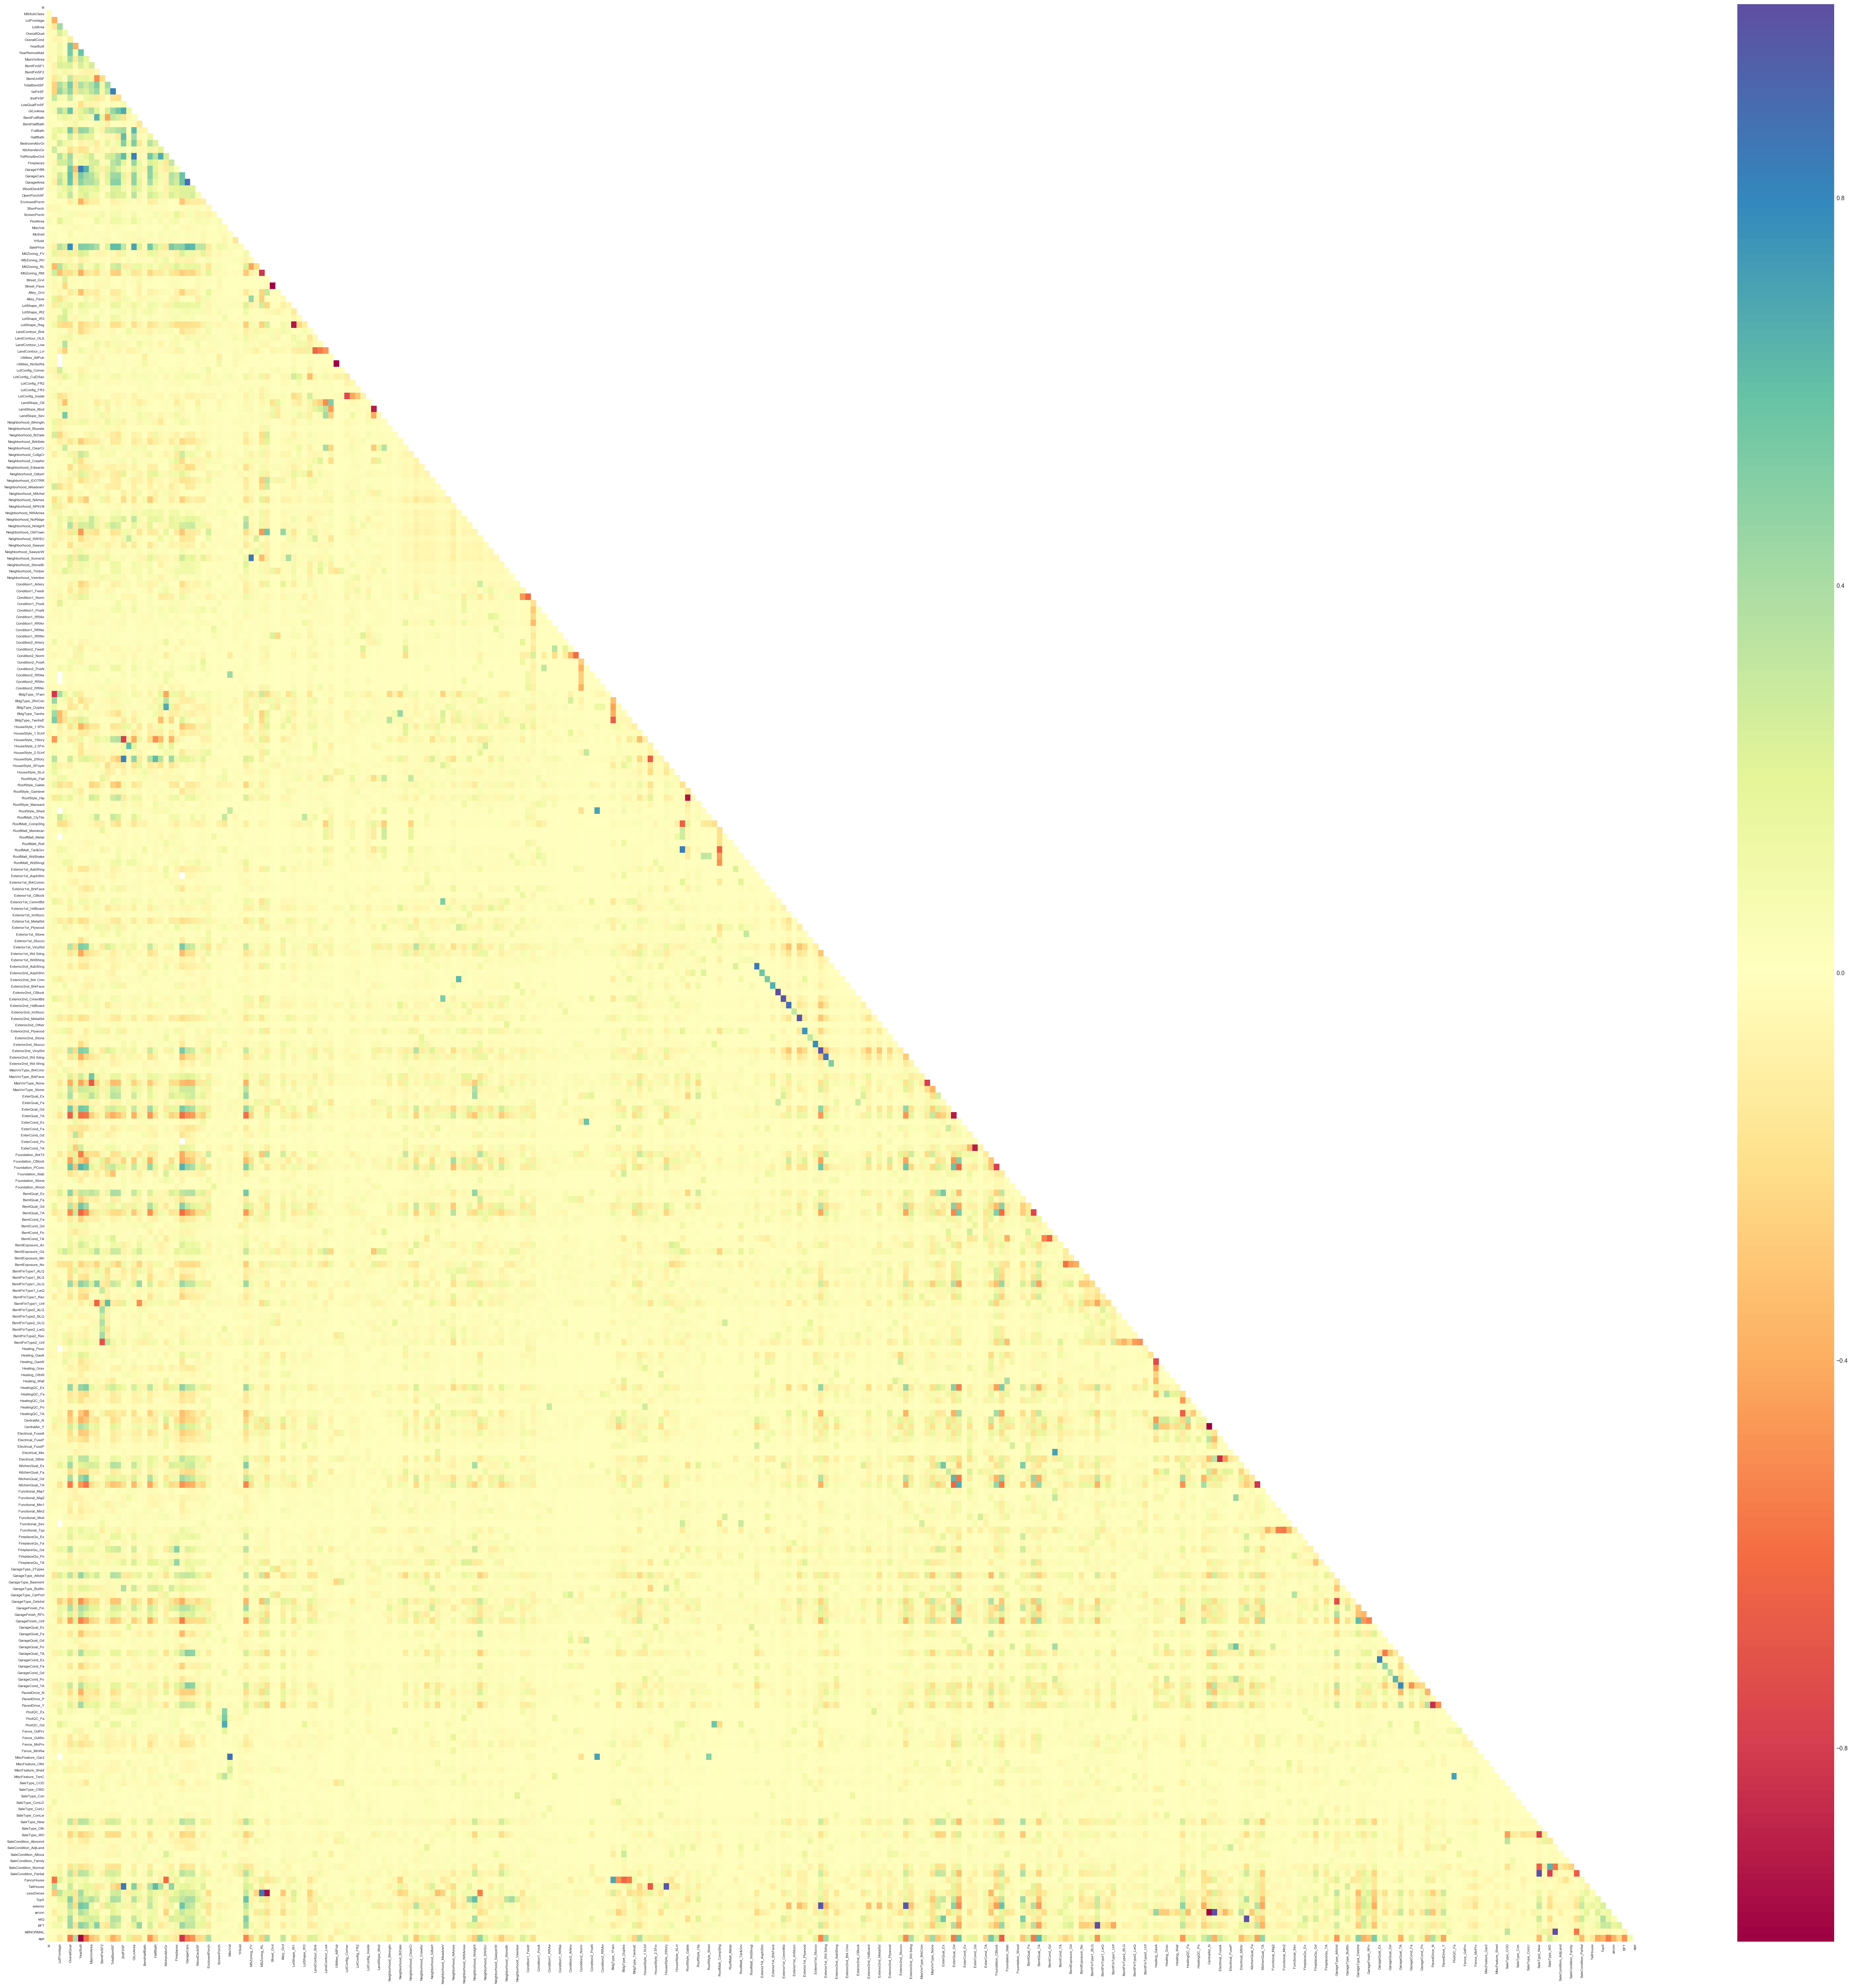

In [7]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = houseD.corr()

# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(60,60))

# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=False, cmap='Spectral', vmin=-1, vmax=1)

# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=6, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=6, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

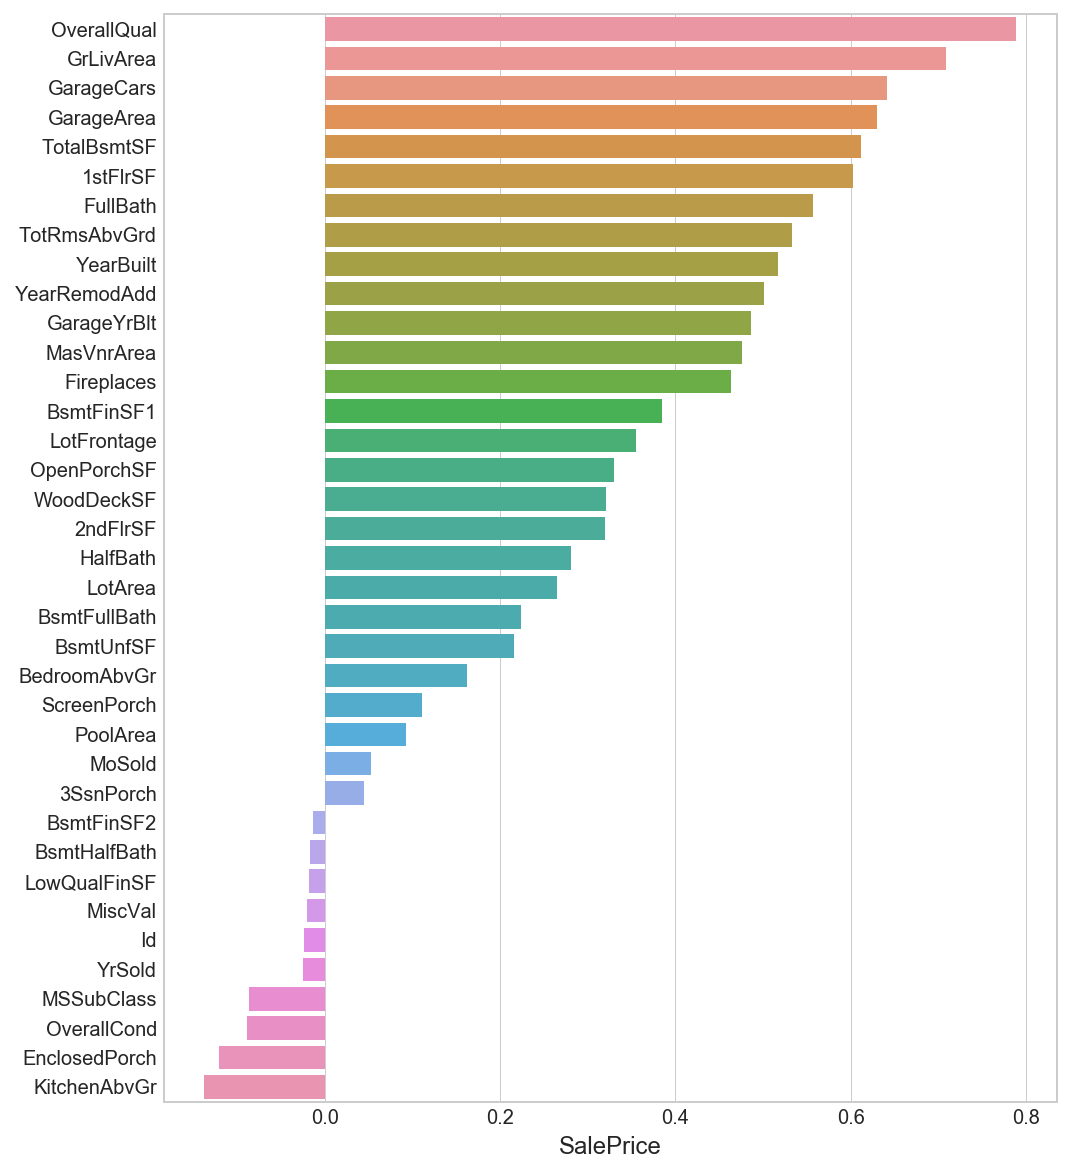

In [8]:
corr = house.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

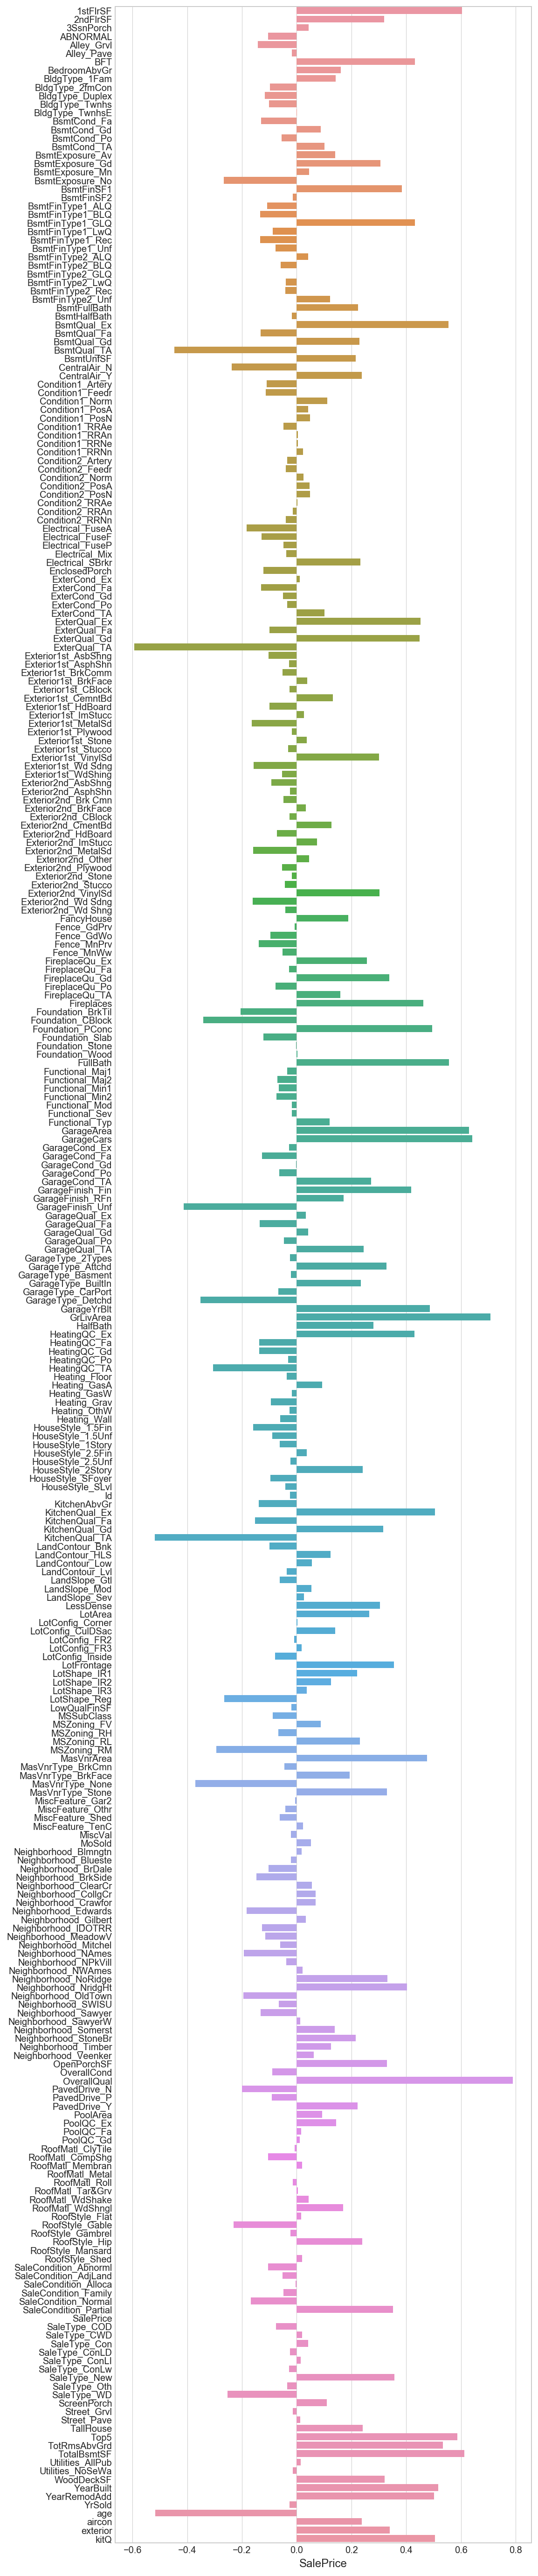

In [9]:
corr = houseD.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,50))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h', order=houseD.columns.sort_values())
plt.show()

In [10]:
houseD.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'ABNORMAL', 'Alley_Grvl',
       'Alley_Pave', 'BFT', 'BedroomAbvGr', 'BldgType_1Fam', 'BldgType_2fmCon',
       ...
       'Utilities_AllPub', 'Utilities_NoSeWa', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'age', 'aircon', 'exterior', 'kitQ'],
      dtype='object', length=299)

In [22]:
# corr = houseD.corr().sort_values('SalePrice', ascending=False)
# plt.figure(figsize=(8,50))
# sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h', order=houseD.columns.sort_values(), hue=corr.SalePrice[1:])
# plt.show()

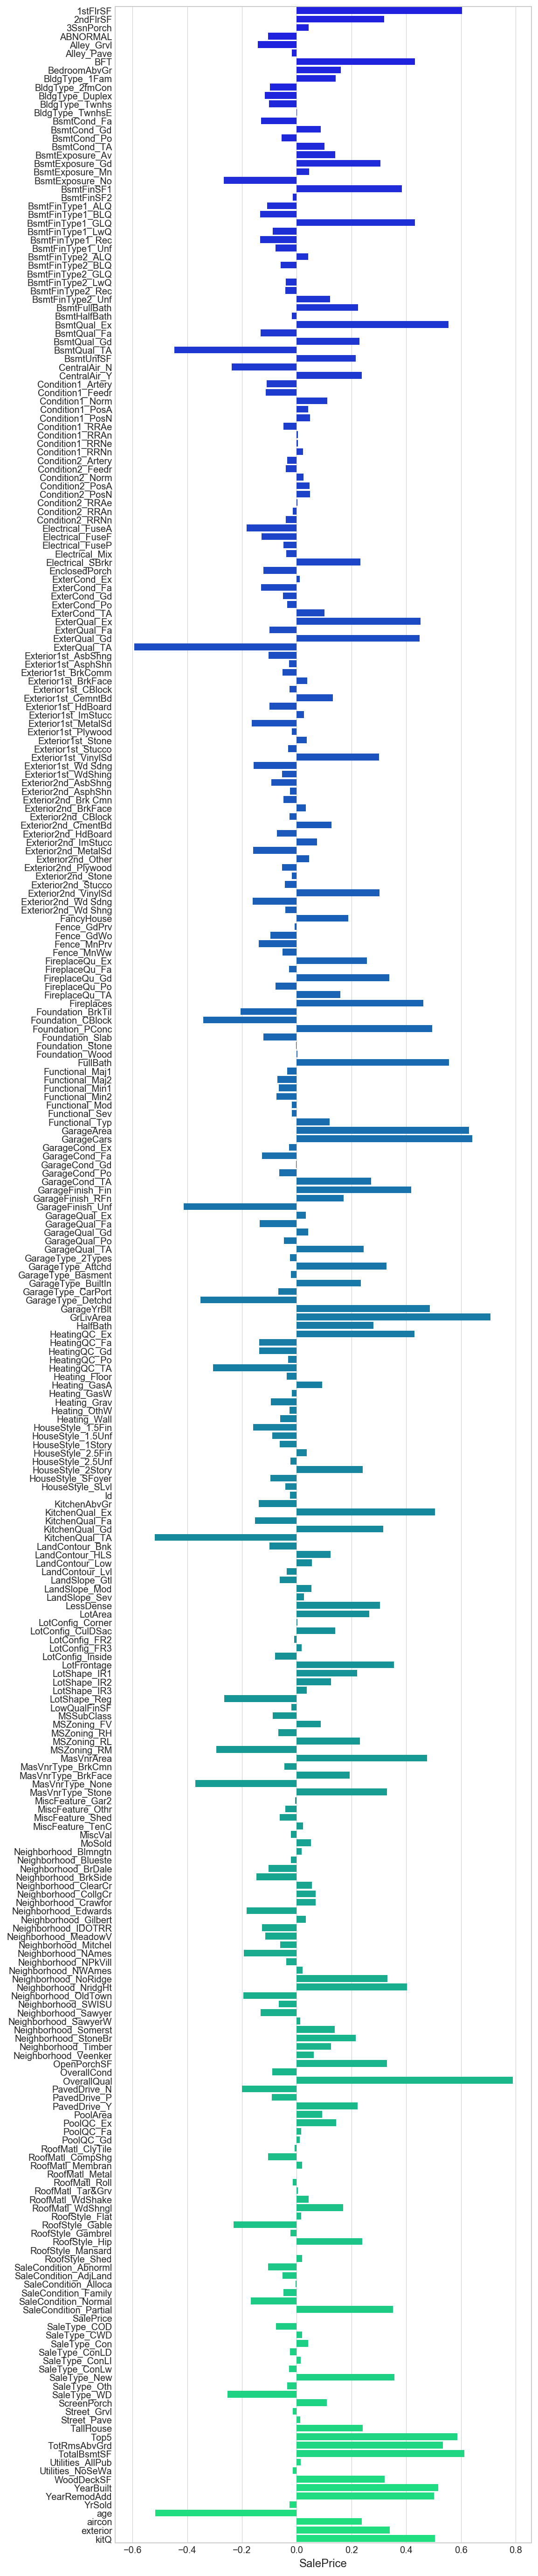

In [20]:
corr = houseD.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,50))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h', order=houseD.columns.sort_values(), palette="winter")
plt.show()